In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Wonhee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset= pd.read_csv("sizekorea2010.csv")
x=dataset.iloc[:,[2,4,7,15,17,18,19,20,22]].values
x_train, x_test=train_test_split(x,test_size=0.2, random_state=0)

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

C:\Users\Wonhee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


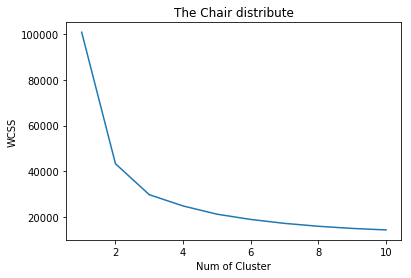

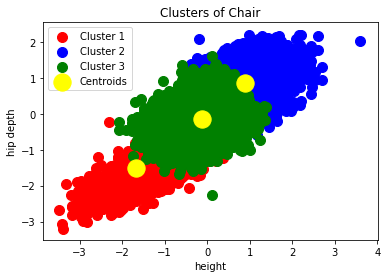

In [3]:
from sklearn.cluster import KMeans
#within cluster sum of squared
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init ='k-means++', random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Chair distribute')
plt.xlabel('Num of Cluster')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_train)
plt.scatter(x_train[y_kmeans == 0, 5], x_train[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_train[y_kmeans == 1, 5], x_train[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_train[y_kmeans == 2, 5], x_train[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Chair')
plt.xlabel('height')
plt.ylabel('hip depth')
plt.legend()
plt.show()